Start by copying this into your Google Drive!!

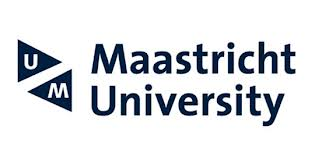
#Faculty of Science and Engineering - Department of Advanced Computer Sciences
# Course Advanced Natural Language Processing (ANLP) - Tutorial Abstracting and GPT-3

By Jan Scholtes

Welcome to the tutorial on abstracting and GPT-3. In this notebook we will visit a few traditional abstracting methods in Python. 

Next, we will switch to the hosted GPT-3 environment where you first have to register, after which you can run a few experiments on OpenAI's environment. The results can then be copied into this Colab Page. As GPT-3 is a closely controled (OpenAI hosted) environment, it is not possible to run it with all features form withing the Colab environment. 

GPT-3 very large to run (requires enormous resources) and OpenAI wishes to control who uses it to avoid abuse.  


# Extractive Summarization

Extractive text summarization ‘extracts’ notable information from the large corpora of text provided and organizes them into clear and concise summaries.

In Extractive Summarization, we identify essential phrases or sentences from the original text and extract only these phrases from the text. These extracted sentences would be the summary.

Extractive text summarization is the most common method used by automatic text summarizers.

Hereunder is a tutorial form colab: (https://colab.research.google.com/github/dipanjanS/nlp_workshop_odsc19/blob/master/Module05%20-%20NLP%20Applications/Project06%20-%20Text%20Summarization.ipynb)



In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Now let's load a text to summarize:

In [ ]:
DOCUMENT = """
The Elder Scrolls V: Skyrim is an action role-playing video game developed by Bethesda Game Studios 
and published by Bethesda Softworks. It is the fifth main installment in The Elder Scrolls series, 
following The Elder Scrolls IV: Oblivion.
The game's main story revolves around the player character's quest to defeat Alduin the World-Eater, 
a dragon who is prophesied to destroy the world. The game is set 200 years after the events of Oblivion 
and takes place in the fictional province of Skyrim. Over the course of the game, the player completes 
quests and develops the character by improving skills. The game continues the open-world tradition of 
its predecessors by allowing the player to travel anywhere in the game world at any time, and to ignore 
or postpone the main storyline indefinitely.
The team opted for a unique and more diverse open world than Oblivion's Imperial Province of Cyrodiil, 
which game director and executive producer Todd Howard considered less interesting by comparison. 
The game was released to critical acclaim, with reviewers particularly mentioning the character advancement 
and setting, and is considered to be one of the greatest video games of all time.


The Elder Scrolls V: Skyrim is an action role-playing game, playable from either a first or 
third-person perspective. The player may freely roam over the land of Skyrim which is an open world 
environment consisting of wilderness expanses, dungeons, cities, towns, fortresses, and villages. 
Players may navigate the game world more quickly by riding horses or by utilizing a fast-travel system 
which allows them to warp to previously discovered locations. The game's main quest can be completed or 
ignored at the player's preference after the first stage of the quest is finished. However, some quests 
rely on the main storyline being at least partially completed. Non-player characters (NPCs) populate the 
world and can be interacted with in a number of ways: the player may engage them in conversation, 
marry an eligible NPC, kill them or engage in a nonlethal "brawl". The player may 
choose to join factions which are organized groups of NPCs — for example, the Dark Brotherhood, a band 
of assassins. Each of the factions has an associated quest path to progress through. Each city and town 
in the game world has jobs that the player can engage in, such as farming.

Players have the option to develop their character. At the beginning of the game, players create 
their character by selecting their sex and choosing between one of several races including humans, 
orcs, elves, and anthropomorphic cat or lizard-like creatures and then customizing their character's 
appearance. Over the course of the game, players improve their character's skills which are numerical 
representations of their ability in certain areas. There are eighteen skills divided evenly among the 
three schools of combat, magic, and stealth. When players have trained skills enough to meet the 
required experience, their character levels up. Health is depleted primarily when the player 
takes damage and the loss of all health results in death. Magicka is depleted by the use of spells, 
certain poisons and by being struck by lightning-based attacks. Stamina determines the player's 
effectiveness in combat and is depleted by sprinting, performing heavy "power attacks" 
and being struck by frost-based attacks. Skyrim is the first entry in The Elder Scrolls to 
include dragons in the game's wilderness. Like other creatures, dragons are generated randomly in 
the world and will engage in combat with NPCs, creatures and the player. Some dragons may attack 
cities and towns when in their proximity. The player character can absorb the souls of dragons 
in order to use powerful spells called "dragon shouts" or "Thu'um". A regeneration 
period limits the player's use of shouts in gameplay.

Skyrim is set around 200 years after the events of The Elder Scrolls IV: Oblivion, although it is 
not a direct sequel. The game takes place in Skyrim, a province of the Empire on the continent of 
Tamriel, amid a civil war between two factions: the Stormcloaks, led by Ulfric Stormcloak, and the 
Imperial Legion, led by General Tullius. The player character is a Dragonborn, a mortal born with 
the soul and power of a dragon. Alduin, a large black dragon who returns to the land after being 
lost in time, serves as the game's primary antagonist. Alduin is the first dragon created by Akatosh, 
one of the series' gods, and is prophesied to destroy and consume the world.
"""

In [ ]:
import re

DOCUMENT = re.sub(r'\n|\r', ' ', DOCUMENT)
DOCUMENT = re.sub(r' +', ' ', DOCUMENT)
DOCUMENT = DOCUMENT.strip()

Gensim is a popular summarizer based on TextRank (https://aclanthology.org/W04-3252/)

In [ ]:
from gensim.summarization import summarize

print(summarize(DOCUMENT, ratio=0.2, split=False))

The game's main story revolves around the player character's quest to defeat Alduin the World-Eater, a dragon who is prophesied to destroy the world.
Over the course of the game, the player completes quests and develops the character by improving skills.
The game continues the open-world tradition of its predecessors by allowing the player to travel anywhere in the game world at any time, and to ignore or postpone the main storyline indefinitely.
The player may freely roam over the land of Skyrim which is an open world environment consisting of wilderness expanses, dungeons, cities, towns, fortresses, and villages.
Each city and town in the game world has jobs that the player can engage in, such as farming.
Over the course of the game, players improve their character's skills which are numerical representations of their ability in certain areas.
Like other creatures, dragons are generated randomly in the world and will engage in combat with NPCs, creatures and the player.


In [ ]:
sentences = nltk.sent_tokenize(DOCUMENT)
len(sentences)

35

TextRank uses the following process:

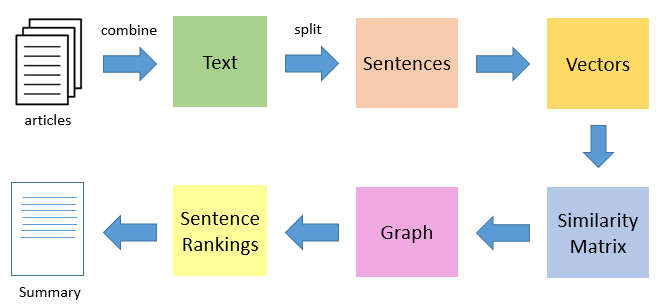

Tokenize and extract sentences from the document to be summarized.

Decide on the number of sentences, k, that we want in the final summary

Build a document-term feature matrix using weights like TF-IDF or Bag of Words.
Compute a document similarity matrix by multiplying the matrix by its transpose.

Use these documents (sentences in our case) as the vertices and the similarities between each pair of documents as the weight or score coefficient we talked about earlier and feed them to the PageRank algorithm.

Get the score for each sentence.

Rank the sentences based on score and return the top k sentences.

Here under you can try these steps one by one: 

##Basic Text Processing

In [ ]:
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_sentences = normalize_corpus(sentences)
norm_sentences[:3]

array(['elder scrolls v skyrim action roleplaying video game developed bethesda game studios published bethesda softworks',
       'fifth main installment elder scrolls series following elder scrolls iv oblivion',
       'games main story revolves around player characters quest defeat alduin worldeater dragon prophesied destroy world'],
      dtype='<U183')

## Text Representation with Feature Engineering

We will be vectorizing our normalized sentences using the TF-IDF feature engineering scheme. We keep things simple and don’t filter out any words based on document frequency. But feel free to try that out and maybe even leverage n-grams as features.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
dt_matrix = tv.fit_transform(norm_sentences)
dt_matrix = dt_matrix.toarray()

vocab = tv.get_feature_names()
td_matrix = dt_matrix.T
print(td_matrix.shape)
pd.DataFrame(np.round(td_matrix, 2), index=vocab).head(10)

(270, 35)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
ability,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
absorb,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.31,0.0,0.00,0.0,0.0,0.00,0.00
acclaim,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.28,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
action,0.25,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.32,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
advancement,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.28,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
akatosh,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.33
alduin,0.00,0.0,0.25,0.0,0.0,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.26,0.27
allowing,0.00,0.0,0.00,0.0,0.0,0.27,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
allows,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
although,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.33,0.0,0.0,0.00,0.00


## Latent Semantic Analysis
Here, we summarize our game description by utilizing document sentences. The terms in each sentence of the document have been extracted to form the term-document matrix, which we observed in the previous cell.

We apply low-rank Singular Value Decomposition to this matrix. The core principle behind Latent Semantic Analysis (LSA) is that in any document, there exists a latent structure among terms that are related contextually and hence should also be correlated in the same singular space.

The main idea in our implementation is to use SVD (recall M = USVT) so that U and V are the orthogonal matrices and S is the diagonal matrix, which can also be represented as a vector of the singular values.

The original matrix can be represented as a term-document matrix where the rows are terms and each column is a document, i.e., a sentence from our document in this case. The values can be any type of weighting like Bag of Words model-based frequencies, TF-IDFs, or binary occurrences.

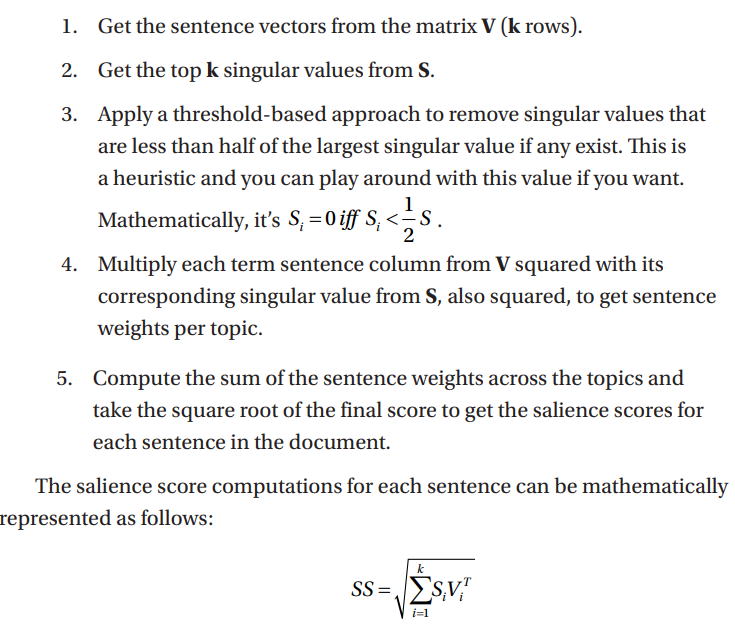



In [ ]:
from scipy.sparse.linalg import svds
    
def low_rank_svd(matrix, singular_count=2):
    u, s, vt = svds(matrix, k=singular_count)
    return u, s, vt

In [ ]:
num_sentences = 8
num_topics = 3

u, s, vt = low_rank_svd(td_matrix, singular_count=num_topics)  
print(u.shape, s.shape, vt.shape)
term_topic_mat, singular_values, topic_document_mat = u, s, vt

(270, 3) (3,) (3, 35)


In [ ]:
# remove singular values below threshold                                         
sv_threshold = 0.5
min_sigma_value = max(singular_values) * sv_threshold
singular_values[singular_values < min_sigma_value] = 0

In [ ]:
salience_scores = np.sqrt(np.dot(np.square(singular_values), 
                                 np.square(topic_document_mat)))
salience_scores

array([0.53291263, 0.61639562, 0.60427539, 0.52307109, 0.50141128,
       0.32352969, 0.1506046 , 0.25383436, 0.60567083, 0.35902104,
       0.22562997, 0.34608934, 0.15781555, 0.40522541, 0.24505982,
       0.19874104, 0.39317895, 0.45392878, 0.31638528, 0.47353378,
       0.18348908, 0.45731421, 0.13929749, 0.38932101, 0.36829067,
       0.57822992, 0.40853736, 0.26260062, 0.38904585, 0.32776714,
       0.67662776, 0.21866561, 0.34687796, 0.3234621 , 0.46107093])

In [ ]:
top_sentence_indices = (-salience_scores).argsort()[:num_sentences]
top_sentence_indices.sort()

In [ ]:
print('\n'.join(np.array(sentences)[top_sentence_indices]))

The Elder Scrolls V: Skyrim is an action role-playing video game developed by Bethesda Game Studios and published by Bethesda Softworks.
It is the fifth main installment in The Elder Scrolls series, following The Elder Scrolls IV: Oblivion.
The game's main story revolves around the player character's quest to defeat Alduin the World-Eater, a dragon who is prophesied to destroy the world.
The game is set 200 years after the events of Oblivion and takes place in the fictional province of Skyrim.
Over the course of the game, the player completes quests and develops the character by improving skills.
The Elder Scrolls V: Skyrim is an action role-playing game, playable from either a first or third-person perspective.
Skyrim is the first entry in The Elder Scrolls to include dragons in the game's wilderness.
Skyrim is set around 200 years after the events of The Elder Scrolls IV: Oblivion, although it is not a direct sequel.


## Build Similarity Matrix

In [ ]:
similarity_matrix = np.matmul(dt_matrix, dt_matrix.T)
print(similarity_matrix.shape)
np.round(similarity_matrix, 3)

(35, 35)


array([[1.   , 0.182, 0.   , ..., 0.   , 0.   , 0.   ],
       [0.182, 1.   , 0.05 , ..., 0.   , 0.   , 0.084],
       [0.   , 0.05 , 1.   , ..., 0.101, 0.165, 0.319],
       ...,
       [0.   , 0.   , 0.101, ..., 1.   , 0.066, 0.069],
       [0.   , 0.   , 0.165, ..., 0.066, 1.   , 0.123],
       [0.   , 0.084, 0.319, ..., 0.069, 0.123, 1.   ]])

## Build Similarity Graph


In [ ]:
import networkx

similarity_graph = networkx.from_numpy_array(similarity_matrix)
similarity_graph

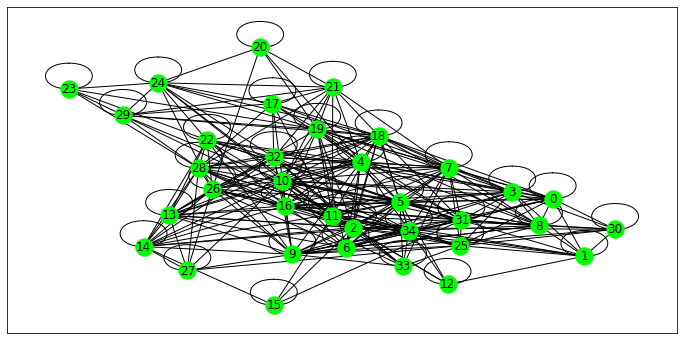

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
networkx.draw_networkx(similarity_graph, node_color='lime')

## Now Find the most important Sentences

In [ ]:
scores = networkx.pagerank(similarity_graph)
ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()), 
                          reverse=True)
ranked_sentences[:10]

[(0.037297049797214744, 2),
 (0.034908435475375886, 25),
 (0.03460086870923607, 4),
 (0.03240744530656925, 8),
 (0.03218748996523769, 28),
 (0.031836734268801445, 11),
 (0.031566658693076226, 26),
 (0.03150616293402057, 3),
 (0.031376143577383796, 5),
 (0.031123481531894214, 16)]

In [ ]:
top_sentence_indices = [ranked_sentences[index][1] 
                        for index in range(num_sentences)]
top_sentence_indices.sort()

In [ ]:
print('\n'.join(np.array(sentences)[top_sentence_indices]))

The game's main story revolves around the player character's quest to defeat Alduin the World-Eater, a dragon who is prophesied to destroy the world.
The game is set 200 years after the events of Oblivion and takes place in the fictional province of Skyrim.
Over the course of the game, the player completes quests and develops the character by improving skills.
The Elder Scrolls V: Skyrim is an action role-playing game, playable from either a first or third-person perspective.
The game's main quest can be completed or ignored at the player's preference after the first stage of the quest is finished.
Skyrim is the first entry in The Elder Scrolls to include dragons in the game's wilderness.
Like other creatures, dragons are generated randomly in the world and will engage in combat with NPCs, creatures and the player.
The player character can absorb the souls of dragons in order to use powerful spells called "dragon shouts" or "Thu'um".


And "voila": the same summary as above!

## Exercise 1:

a) What are the limitations of Extractive Summarization that you experience?

b) How could you address these?

ANSWER HERE
a)Extractive Summarization does not present the meaning of the document.It just takes the most important sentences and combine them.As a result a lot of information is lost. We observe that Extractive Summarization is unable to predict the summary clearly and repeating the same words.('game')

b) BERT can be used to boost the performance of extractive summarization and fine-tuning it with summarization Layers.We can assume extractive summarization as the task of binary classification assigning a label to each sentence whether the sentence should be included in the summary or not.
After obtaining the sentence vectors from BERT,
we build several summarization-specific layers
stacked on top of the BERT outputs, to capture
document-level features for extracting summaries.

# Abstractive Summarization

Abstractive text summarization generates real sentences from the entirety of the text provided. It rewrites large amounts of text by creating acceptable representations, which is further processed and summarized by natural language processing.

This method uses a statitical or large (deep learning) language model to generate such sentences. 

It generates new sentences from the original text in the abstractive summarization approach. So, sentences generated through this abstractive summarization might not even be present in the original text.

Here is a short tutorial based on a script from HugginFace. 

Let's start with installing PyTorch

In [ ]:
!pip3 install torch==1.8.2+cu102 torchvision==0.9.2+cu102 torchaudio==0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
     |████████████████████████████████| 804.1 MB 8.5 kB/s 
     |████████████████████████████████| 17.3 MB 251 kB/s 
     |████████████████████████████████| 1.9 MB 56.7 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.1+cu113
    Uninstalling torchvision-0.13.1+cu113:
      Successfully uninstalled torchvision-0.13.1+cu113
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.12.1+cu113
    Uninstalling torchaudio-0.12.1+cu113:
      Successfully uninstalled torchaudio-0.12.1+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are insta

Our next dependency is HuggingFace transformers

In [ ]:
!pip3 install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 7.2 MB/s 
     |████████████████████████████████| 7.6 MB 52.5 MB/s 
     |████████████████████████████████| 182 kB 46.1 MB/s 


In [ ]:
!pip3 install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 7.1 MB/s 


**Importing and configuring the Pegasus model**

In [ ]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer

In [ ]:
tokenizer_model = PegasusTokenizer.from_pretrained("google/pegasus-xsum")

Downloading:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

In [ ]:
loaded_model = PegasusForConditionalGeneration.from_pretrained("google/pegasus-xsum")

Downloading:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

**Performing abstractive summarization **

In [ ]:
text = """Hugging Face is a great open-source library that is doing powerful work in the Natural Language Processing (NLP) space. 
The library has a bunch of pre-trained models which you can leverage or fine-tune. 

The library has many models including BERT and GPT-2 models that perform various tasks, but for our purpose, we’ll be leveraging the pre-trained language pipeline. 
Rather than going ahead and training a huge language model such as GPT-2 with 1.5 billion parameters, one can leverage the ML pipeline instead."""

In [ ]:
tokens = tokenizer_model(text, truncation=True, padding="longest", return_tensors="pt")

In [ ]:
tokens

{'input_ids': tensor([[ 1176, 73940,  8515,   117,   114,   255,   428,   121,  9534,  2400,
           120,   117,   557,  1512,   201,   115,   109,  4284,  7148, 11430,
           143, 72237,   158,   501,   107,   139,  2400,   148,   114,  4371,
           113,  1133,   121, 14787,  1581,   162,   119,   137,  7043,   132,
          1226,   121, 20619,   107,   139,  2400,   148,   223,  1581,   330,
           110, 62613,   111,  9688,   930,  5729,  1581,   120,  1798,   623,
          2722,   108,   155,   118,   150,  1396,   108,   145,   123,   267,
           129, 15479,   109,  1133,   121, 14787,  1261,  7684,   107,  7430,
           197,   313,  1573,   111,   569,   114,  1124,  1261,   861,   253,
           130,  9688,   930,  5729,   122,  5594,  1722,  5384,   108,   156,
           137,  7043,   109, 22099,  7684,  1088,   107,     1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1,

In [ ]:
summary = loaded_model.generate(**tokens)

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1364: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 64 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


In [ ]:
summary[0]

tensor([    0,   222,   136,   450,   108,   125,   123,   208,   313,   112,
          403,   119,   199,   112,   207,   109,  1176, 73940,  8515,  2400,
          112,  1976, 22099,  1581,   107,     1])

In [ ]:
tokenizer_model.decode(summary[0])

'In this post, I’m going to show you how to use the Hugging Face library to train ML models.'

Downloading:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1364: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 128 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


'The library has a bunch of pre-trained models which you can leverage or fine-tune.<n>Rather than going ahead and training a huge language model such as GPT-2 with 1.5 billion parameters, one can leverage the ML pipeline instead.'

Or let's take the text we used for the Extractive Summarization approach: 

In [ ]:
text = """"The Elder Scrolls V: Skyrim is an action role-playing video game developed by Bethesda Game Studios 
and published by Bethesda Softworks. It is the fifth main installment in The Elder Scrolls series, 
following The Elder Scrolls IV: Oblivion.
The game's main story revolves around the player character's quest to defeat Alduin the World-Eater, 
a dragon who is prophesied to destroy the world. The game is set 200 years after the events of Oblivion 
and takes place in the fictional province of Skyrim. Over the course of the game, the player completes 
quests and develops the character by improving skills. The game continues the open-world tradition of 
its predecessors by allowing the player to travel anywhere in the game world at any time, and to ignore 
or postpone the main storyline indefinitely.
The team opted for a unique and more diverse open world than Oblivion's Imperial Province of Cyrodiil, 
which game director and executive producer Todd Howard considered less interesting by comparison. 
The game was released to critical acclaim, with reviewers particularly mentioning the character advancement 
and setting, and is considered to be one of the greatest video games of all time.


The Elder Scrolls V: Skyrim is an action role-playing game, playable from either a first or 
third-person perspective. The player may freely roam over the land of Skyrim which is an open world 
environment consisting of wilderness expanses, dungeons, cities, towns, fortresses, and villages. 
Players may navigate the game world more quickly by riding horses or by utilizing a fast-travel system 
which allows them to warp to previously discovered locations. The game's main quest can be completed or 
ignored at the player's preference after the first stage of the quest is finished. However, some quests 
rely on the main storyline being at least partially completed. Non-player characters (NPCs) populate the 
world and can be interacted with in a number of ways: the player may engage them in conversation, 
marry an eligible NPC, kill them or engage in a nonlethal "brawl". The player may 
choose to join factions which are organized groups of NPCs — for example, the Dark Brotherhood, a band 
of assassins. Each of the factions has an associated quest path to progress through. Each city and town 
in the game world has jobs that the player can engage in, such as farming.

Players have the option to develop their character. At the beginning of the game, players create 
their character by selecting their sex and choosing between one of several races including humans, 
orcs, elves, and anthropomorphic cat or lizard-like creatures and then customizing their character's 
appearance. Over the course of the game, players improve their character's skills which are numerical 
representations of their ability in certain areas. There are eighteen skills divided evenly among the 
three schools of combat, magic, and stealth. When players have trained skills enough to meet the 
required experience, their character levels up. Health is depleted primarily when the player 
takes damage and the loss of all health results in death. Magicka is depleted by the use of spells, 
certain poisons and by being struck by lightning-based attacks. Stamina determines the player's 
effectiveness in combat and is depleted by sprinting, performing heavy "power attacks" 
and being struck by frost-based attacks. Skyrim is the first entry in The Elder Scrolls to 
include dragons in the game's wilderness. Like other creatures, dragons are generated randomly in 
the world and will engage in combat with NPCs, creatures and the player. Some dragons may attack 
cities and towns when in their proximity. The player character can absorb the souls of dragons 
in order to use powerful spells called "dragon shouts" or "Thu'um". A regeneration 
period limits the player's use of shouts in gameplay.

Skyrim is set around 200 years after the events of The Elder Scrolls IV: Oblivion, although it is 
not a direct sequel. The game takes place in Skyrim, a province of the Empire on the continent of 
Tamriel, amid a civil war between two factions: the Stormcloaks, led by Ulfric Stormcloak, and the 
Imperial Legion, led by General Tullius. The player character is a Dragonborn, a mortal born with 
the soul and power of a dragon. Alduin, a large black dragon who returns to the land after being 
lost in time, serves as the game's primary antagonist. Alduin is the first dragon created by Akatosh, 
one of the series' gods, and is prophesied to destroy and consume the world."""

In [ ]:
tokens = tokenizer_model(text, truncation=True, padding="longest", return_tensors="pt")
summary = loaded_model.generate(**tokens)

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1364: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 64 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


In [ ]:
tokenizer_model.decode(summary[0])


'The Elder Scrolls V: Skyrim is a video game developed by Bethesda Game Studios and published by Bethesda Softworks.'

## Exercise 2: 

a) How can you get a longer summary?

b) What are the limitations of Abstractive Summarization that you experience?

c) How could you address these? 

ANSWER HERE

a)If we use other pegasus model for this text we can get a longer summary...code below..
But generraly it produces short sentences.
We could also combine abstractive with extractive summarization.Using extractive and abstractive models jointly significantly improves summarization results.
b)Abstractive text summarization models tend to generate false information.
Pegasus models can handle maximum 1024 input size.So they can not handle large texts.

max_model_length = {
    "xsum": 512,
    "cnn_dailymail": 1024,
    "newsroom": 512,
    "wikihow": 512,
    "multi_news": 1024,
    "reddit_tifu": 512,
    "big_patent": 1024,
    "arxiv": 1024,
    "pubmed": 1024,
    "gigaword": 128,
    "aeslc": 512,
    "billsum": 1024,
    "large": 1024,
}

C)To adress these limitations we can add self attention to the model.

pass max_position_embeddings as a kwarg to from_pretrained

=2048 uses the maximum input length

Other methods that could adress the limitations of abstractive summarization:


*   Entity-based Data Filtering

*   Multi-task Learning


*   Join Salient Entity and Summary Generation (JAENS)






In [ ]:
tokenizer_model2 = PegasusTokenizer.from_pretrained("google/pegasus-cnn_dailymail")
loaded_model2 = PegasusForConditionalGeneration.from_pretrained("google/pegasus-cnn_dailymail")
tokens = tokenizer_model2(text, truncation=True, padding="longest", return_tensors="pt")
summary2 = loaded_model2.generate(**tokens)
### min_lenght=100
tokenizer_model2.decode(summary2[0])

In [ ]:
tokenizer_model3 = PegasusTokenizer.from_pretrained("google/pegasus-newsroom")
loaded_model3 = PegasusForConditionalGeneration.from_pretrained("google/pegasus-newsroom")
tokens = tokenizer_model3(text, truncation=True, padding="longest", return_tensors="pt")
summary3 = loaded_model3.generate(**tokens)
tokenizer_model3.decode(summary3[0])

Downloading:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1364: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 128 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


'"The Elder Scrolls V: Skyrim is an action role-playing video game developed by Bethesda Game Studios and published by Bethesda Softworks. It is the fifth main installment in The Elder Scrolls series, following The Elder Scrolls IV: Oblivion. The game\'s main story revolves around the player character\'s quest to defeat Alduin the World-Eater, a dragon who is prophesied to destroy the world. The game is set 200 years after the events of Oblivion and takes place in the fictional province of Skyrim. Over the course of the game, the player completes quests and develops the character by improving skills.'

# GPT-3

Generative Pre-trained Transformer 3 is an autoregressive language model that uses deep learning to produce human-like text. 
It is the third-generation language prediction model in the GPT-n series created by OpenAI, a San Francisco-based artificial intelligence research laboratory.

GPT-3's full version has a capacity of 175 billion machine learning parameters. GPT-3, which was introduced in May 2020, and was in beta testing as of July 2020, is part of a trend in natural language processing (NLP) systems of pre-trained language representations.

The quality of the text generated by GPT-3 is so high that it can be difficult to determine whether or not it was written by a human, which has both benefits and risks. Thirty-one OpenAI researchers and engineers presented the original May 28, 2020 paper introducing GPT-3. In their paper, they warned of GPT-3's potential dangers and called for research to mitigate risk.  

David Chalmers, an Australian philosopher, described GPT-3 as "one of the most interesting and important AI systems ever produced."

Microsoft announced on September 22, 2020, that it had licensed "exclusive" use of GPT-3; others can still use the public API to receive output, but only Microsoft has access to GPT-3's underlying model.

An April 2022 review in The New York Times described GPT-3's capabilities as being able to write original prose with fluency equivalent to that of a human.


## GPT-Playground

Go to the GPT-3 Playground and create your account. Follow the instructions in slide 75 of the lecture.


## Exercise 3: 

a) Investigate the influence of the length of the prompt

b) How can we use different versions of a prompt to implement zero-shot, one-shot or few-shot learning. Explain!



YOUR ANSWER HERE
This model's maximum context length is 4097 tokens.As a result, as many tokens the prompt has,the less tokens can be generated as completion.
It can generate amazingly accurate text with just few tokens.
GPT3 performs few-shot learning remarkably well.It is less successful at zero-shot learning.GPT-3’s zero-shot performance is much worse than few-shot performance on tasks such as reading comprehension, question answering, and natural language inference. One potential reason is that, without few-shot exemplars, it is harder for models to perform well on prompts that are not similar to the format of the pretraining data.


Zero-shot learning is about giving no example.One shot is about giving one example to .Few-shot learning uses a small set of examples from new data to learn a new task.

## Exercise 4: GPT-3 can also be used for batch classification or meta data generation. 

How would yo do that?

YOUR ANSWER HERE 

Batch classification in Playground:

Analyze sentences in terms of the feeling.Classify these sentences as happiness,sadness,neutral:
sentence: I am so excited that i passed the course.
meaning:happy
sentence:Its raining today.
meaning:neutral
sentence:I dont know how to manage all this situation.Its so hard for me.
meaning:sadness
sentence:I am so stressed with the courses.

meaning:sadness <-----(this was the output)

Meta data generation in Playground:

Find the time the following email was sent:
To: George
From: Eva
Subject: Data science
Day and Time: 27/11/21 9:32
Main Body: In simple terms, a data scientist's job is to analyze data for actionable insights. Specific tasks include: Identifying the data-analytics problems that offer the greatest opportunities to the organization. Determining the correct data sets and variables.




The email was sent on 27/11/21 at 9:32.  <-----(this was the output)

###
Metadata is simply data about data. It means it is a description and context of the data.Those are some typical metadata elements:

Title and description,
Tags and categories,
Who created and when,
Who last modified and when,
Who can access or update.

Examples:
-Every email has a lot of metadat such us subject,
from,
to,
date and time sent
-Every book has metadata such as a title,
author name,
publisher and copyright details,
description on a back,
table of contents,
index,
page numbers.

WE encourage you to do a few more experiments with GPT-3 and amaze yourself. Please tell us about your adventreus below. 

YOUR ADVENTURES WITH GPT-3
It can generate amazingly accurate text(songs,fairytales..) with just few tokens.